Открывание сжатых файлов
У функции pd.read_csv есть аргумент compression, который принимает строчку типа компрессии и открывает заархивированный файл: 

ads_data = pd.read_csv('ads_data.csv.zip', compression='zip')

Формат UNIX time
=
Время может быть указано в разном формате, один из них — число секунд, прошедших с 1970 года.

Кажется странным? (Мне — да).

Зато удобно — времена представляются как целые числа, которые легко вычитать и сравнивать, а при необходимости можно сконвертировать в human-readable формат:

pd.to_datetime(1554076848, unit='s')

Атрибуты времени
=
Временные серии обладают атрибутом dt, в котором находится множество атрибутов и методов для доступа ко времени. Давайте посмотрим на часть из них:
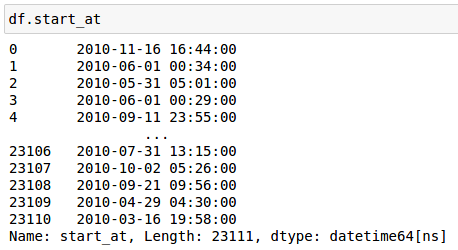


Микросекунды
=====
dt.microsecond — сколько микросекунд в указанном времени (то есть, если время 5 минут, 0 секунд и 3 микросекунды, то он вернёт 3, а не 5 * 60 * 106)
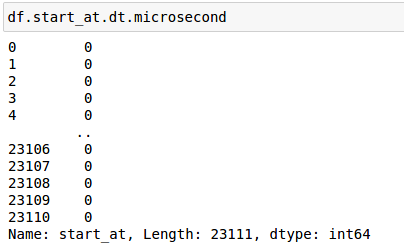

Секунды
=====
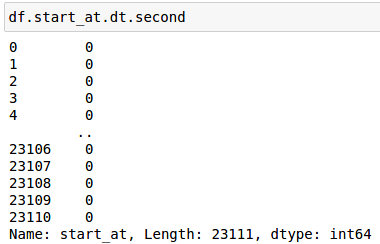

Минуты
==
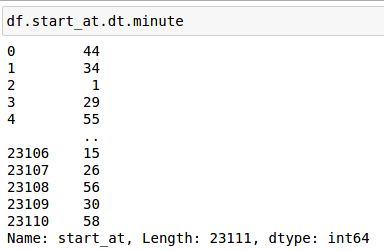

Час
==
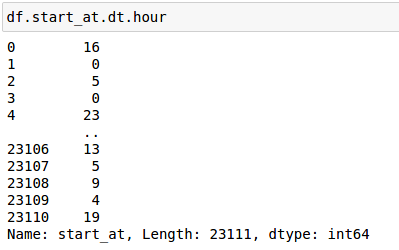

День месяца
==
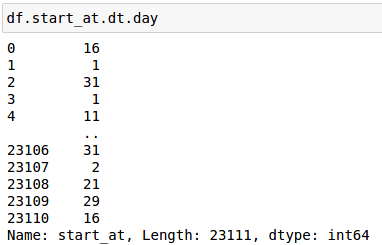

Номер дня в недели
==
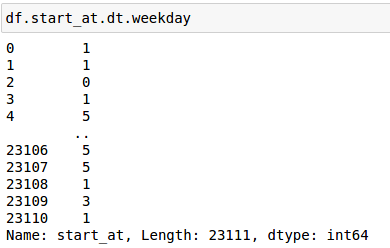

Имя дня в недели
==
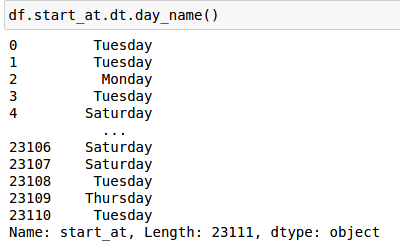

Номер недели в году
==
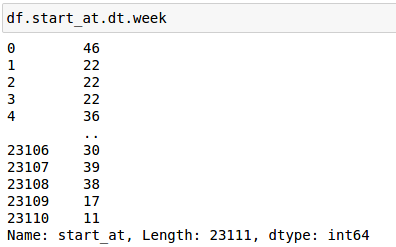

Номер месяца
==
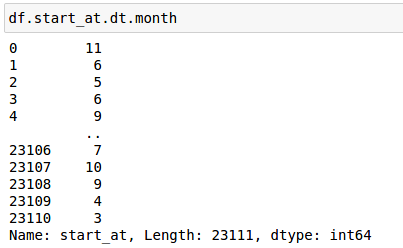

Название месяца
==
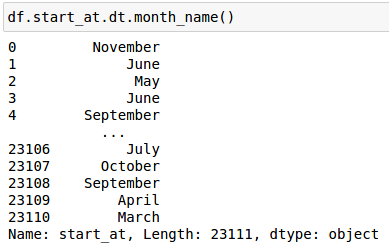

Год
==
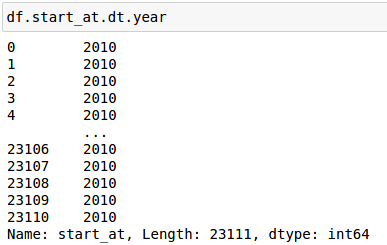

Число дней в текущем месяце
==
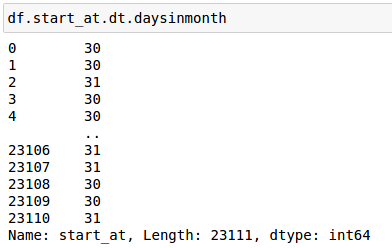

Разность времени
==
Timedelta — это тип данных, соответствующий разнице двух времён, то есть, какая-то продолжительность времени.
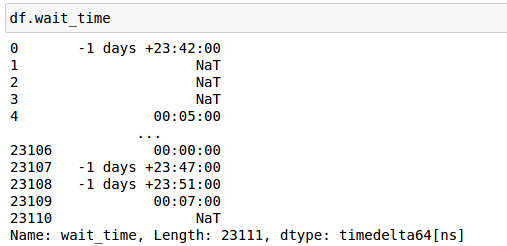

Компоненты
==
Все единицы измерения времени можно извлечь сразу с помощью атрибута components
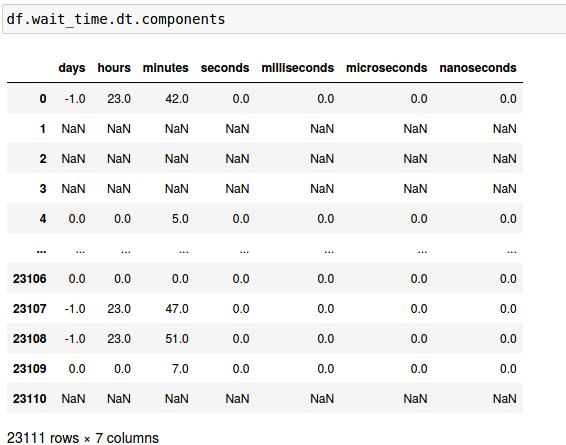

quantile
==
Метод для поиска определённых перцентилей. Принимает число от 0 до 1, обозначающее перцентиль в виде доли:

0 — нулевой перцентиль
0.1 — десятый перцентиль
0.75 — 75-й перцентиль (также третий квартиль)
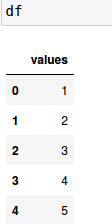

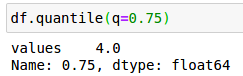

Также в  q можно передать список всех желаемых перцентилей:
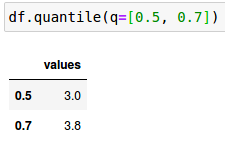

Что делать со значениями, не попадающими в перцентиль?

Если ровно по заданному перцентилю в датафрейме нет значения, то по умолчанию метод линейно выведет его. Поменять это поведение можно с помощью параметра interpolation. Вариант 'higher' берёт большую точку из смежных: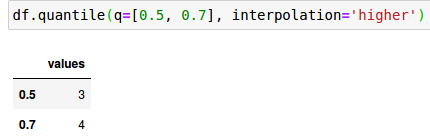

P.S. Краткость — сестра таланта, но не в создании названий параметров в одну букву. Здесь сложно перепутать, так как название метода намекает, но когда будете создавать свои функции и методы, называйте всё осмысленно.

Сводные таблицы
==
Сводные таблицы — удобный способ преобразовать данные, с возможностью применения к ним агрегирующей функции. В pandas есть 2 функции, различающиеся только тем, проводится ли агрегация. 

Обе принимают 3 аргумента:

index — название колонки, значения из которой станут индексами.
columns — название колонки, значения из которой станут колонками.
values — название колонки, значения из которой распределятся по сформированным группам.
Теперь разберем сами функции:

pivot
==
Преобразует датафрейм в таблицу, где значения использованных колонок становятся новыми индексами и колонками:
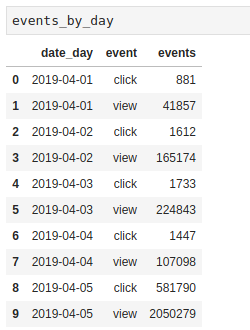

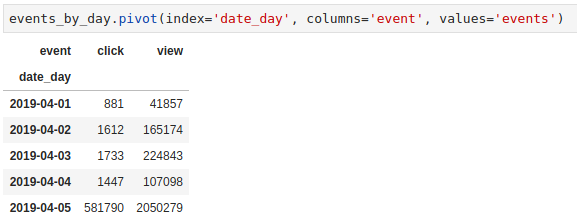

pivot_table
==
Всё как в предыдущем методе, только можно произвести агрегацию, получая одно значение из группы с одинаковыми значениями в новых индексах и колонках. По умолчанию берётся среднее от группы значений.
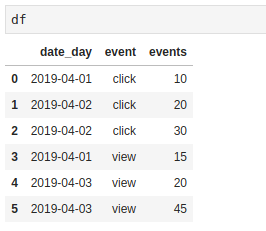

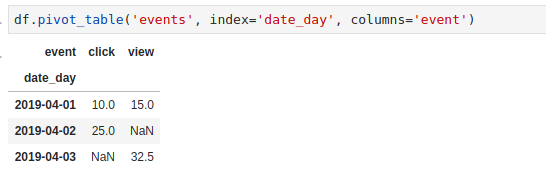

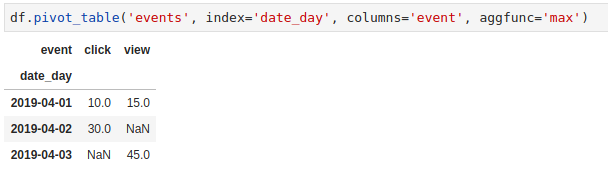

Альтернативный способ создания колонок
==
Колонки в датафрейме можно также создать с помощью метода assign. Он возвращает исходный датафрейм с добавленными колонками — нужно перезадать переменную, чтобы изменить датафрейм.

В метод передаются аргументы формата название колонки = её содержимое — как название параметра и его значение при вызове функции. Здесь название колонок нужно писать без кавычек.

Мы задаём новую колонку loyality, значения в которой являются отношением значений в колонке max_orders к значениям в колонке orders:
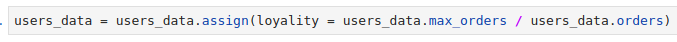

Замена пропущенных значений
==
Замена пропущенных значений — часто возникающая задача в некоторых сферах. Одно из простых решений — заменить все на одно значение (например, 0). Это можно сделать с помощью метода fillna, принимающего значение, на которое будут заменены пропущенные значения:
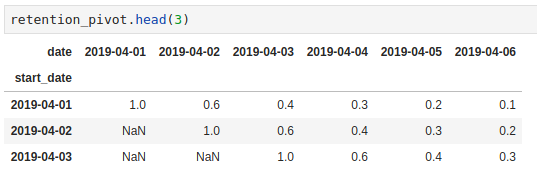

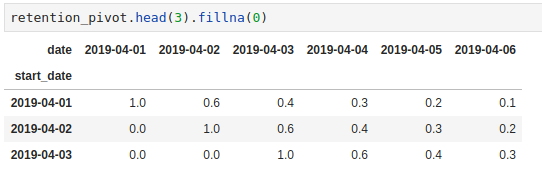

loc
==
До этого при отборе определённых строк мы пользовались методом query или использовали []. Также существует метод loc (и его собрат iloc), позволяющий выбрать поднабор строк и колонок из датафрейма. В некоторых случаях loc удобнее, но обычно запись с ним более громоздкая и он работает медленнее query
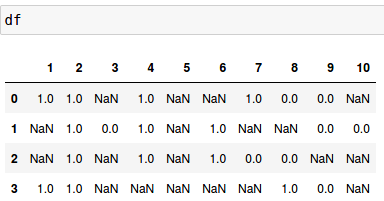

Эта запись отберёт все строки из датафрейма, где значения в колонке '6' равны 1, и колонки от '1' до '6'
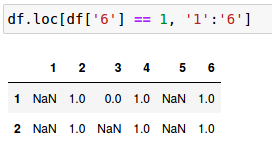
Кусок df['6'] == 1 возвращает логическую серию, где напротив нужных значений стоит True. Вместо df['6'] == 1 может быть любое выражение, которое даст коллекцию True/False размером с число строк в датафрейме (в нашем случае — 4)

Lineplot
==
Line chart – линейная диаграмма. По оси x и y откладываются значения точек, эти точки соединяются. Аргумент hue принимает имя колонки, по значениям которой идёт разделение на цвета: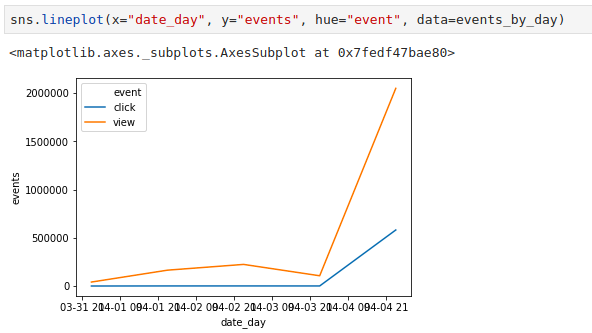

Heatmap
==
Удобный тип графика, когда есть множество значений с двумя категориальными признаками (обычно это индекс и колонки в датафрейме). По осям откладываются значения этих категориальных переменных, каждая ячейка — значение, которое мы визуализируем. Интенсивность ячейки пропорциональна значению.
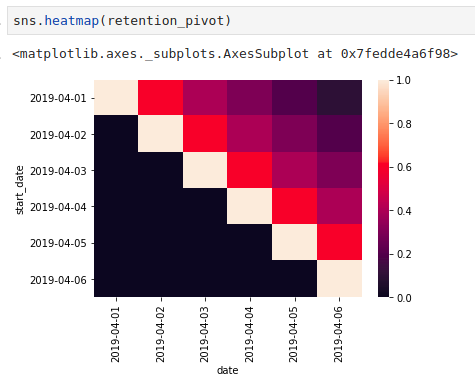

Регулярные выражения
==
Их также называют регэкспы или РЕ. При работе с текстовыми данными часто возникает необходимость их парсить (то есть извлекать нужные данные из всего текста). Возьмем такой пример: у нас есть данные о почтовых адресах пользователях, и мы хотим узнать, с каких доменов (всё, что после @) у нас пользователей больше:

vasya@yandex.ru
katya_ivanova@gmail.com
sasha@karpov.courses.com
masha@gmail.com

Мы могли бы посчитать по доменным именам value_counts, если бы они были у нас в колонке в датафрейме. Но что делать, если нам даны целые мэйлы?

На помощь приходят регулярные выражения. Регулярные выражения — это специальный язык для описания низкого уровня языковой грамматики. Не углубляясь в определения, РЕ позволяют вычленить из регулярного текста (его структура одинакова/почти одинакова на протяжении всего текста) нужные нам части.

Сначала разберём всё в простом питоне, а потом уже в пандасе.В данном примере с почтой мы можем просто воспользоваться строковые методы питона:

засплитить по @
взять последнюю часть получившегося списка
...
PROFIT
Но не на всех задачах встроенные методы так хорошо работают. Сначала посмотрим, как решить этот таск РЕ, а потом разберём что-нибудь посложнее. Решение и его объяснение:

import re


mail = 'vasya@yandex.ru'

pattern = re.compile('@([\w.]+)')

pattern.findall(mail)
['yandex.ru']

import re — импотиртируем библиотеку для работы с регулярными выражениями, в чистом питоне их нет.
pattern = re.compile('@([\w.]+)') — с помощью функции compile из модуля re создаём паттерн (образец), который будем искать в тексте, и помещаем его в переменную pattern. Паттерн создаётся при помощи строки — о том, с чем совпадает (что матчит) этот паттерн мы поговорим дальше.
Паттерн обладает набором методов (также, как у датафрэйма есть методы), один из которых мы и используем.
pattern.findall(mail) — применяем метод findall на строке с почтой. Метод findall возвращает список со всеми встречаниями паттерна (pattern) в строке, где мы ищем (mail)
В результате мы получили список с одним мэтчем — ['yandex.ru']
На первый взгляд кажется непонятно (и неудивительно — мы ещё не обсуждали способ описания паттерна) и бессмысленно, ведь есть split. Однако у этого способа уже на чуть более сложной задаче есть плюсы:

text = '''We have several emails - vasya@yandex.ru, katya_ivanova@gmail.com,
sasha@karpov.courses.com and also masha@gmail.com'''

pattern.findall(text)
['yandex.ru', 'gmail.com', 'karpov.courses.com', 'gmail.com']

Одним питоновским сплитом мы бы тут не отделались! В следующей главе поговорим об описании паттерна.

Азбука регулярных выражений
==
Как уже говорилось, РЕ это язык о регулярном языке. Для его описания используется набор символов. Рассмотрим наиболее частые из них:            

Буквы и цифры
==
Все буквы и цифры в паттерне обозначают буквы. То есть, если мы напишем,

import re


text = 'the gray fox jumps over the lazy dog'

pattern = re.compile('ox')
pattern.findall(text)
['ox']  # from the fox

Метасимволы
Специальные символы для ре, обозначающие группу значений

\d — любая цифра (digits)
\D — всё, что угодно, кроме цифры
\s — любой пробельный символ (spaces)
\S — всё, что угодно, кроме пробельного символа
\w — любая буква, цифра или _ (words)
\W — всё, что угодно, кроме буквы, цифр или _
То есть нижний регистр — хотим это, верхний регистр — хотим не это.

Ещё есть:

. — любой символ
Пара примеров:

Тройки цифр

text = '+7-921-000-00-00 +7-981-555-55-55'

pattern = re.compile('\d\d\d')
pattern.findall(text)
['921', '000', '981', '555']

Фрагменты из 4-х знаков, начинающиеся с 'в'

asimov = '''Робот не может причинить вред человеку или своим бездействием допустить, чтобы человеку был причинён вред.
Робот должен повиноваться всем приказам, которые даёт человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.
Робот должен заботиться о своей безопасности в той мере, в которой это не противоречит Первому или Второму Законам.'''


pattern = re.compile('в...')
pattern.findall(asimov)
['вред', 'веку', 'воим', 'вием', 'веку', 'вред', 'вино', 'вать', 'всем', 'век,', 'в, к', 'воре', 'вому', 'воей', 'в то', 'в ко', 'воре', 'вому']

Группы
==
Скобочки (()) имеют особое значение — они обозначают группы символов в паттерне. Благодаря этому мы можем извлечь кусочки из заматчившегося паттерна. Например, достанем только код из телефонного номера:

text = '+7-921-000-00-00 +7-981-555-55-55'

pattern = re.compile('(\d\d\d)-(\d\d\d)')
pattern.findall(text)
[('921', '000'), ('981', '555')]

Обратите внимание, что мы получаем кортежи, где каждый элемент — группа из одного матча. Это позволяет нам извлечь нужную группу из каждого матча (хотя бы просто циклом по pattern.findall(...) с извлечением 0-го элемента). Раньше мы получали все тройки цифр сплошняком.
Другое наблюдение — минус в паттерне никак не отображается: мы матчим в тексте 3 цифры, минус, 3 цифры. То есть он должен быть в тексте, чтобы заматчить, но мы можем убрать его из аутпута.

                  

Квантификаторы
==
Квантификаторы — это символы, позволяющие специфицировать, сколько раз нужно повторить то, что идёт до них. Вот их виды:

* — сколько угодно раз (0 — бесконечность)
+ — 1 или больше раз
? — 0 или 1 раз (то есть или предыдущий символ будет, или нет)
{} — в скобочках можно указать точное количество или диапазон, читайте подробнее о них и других символах в документации.
Квантификаторы можно ставить после символа или группы. К примеру, отберём весь текст, начинающийся со слов человек:

asimov = '''Робот не может причинить вред человеку или своим бездействием допустить, чтобы человеку был причинён вред.
Робот должен повиноваться всем приказам, которые даёт человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.
Робот должен заботиться о своей безопасности в той мере, в которой это не противоречит Первому или Второму Законам.'''


pattern = re.compile('человек.*')
pattern.findall(asimov)
['человеку или своим бездействием допустить, чтобы человеку был причинён вред.',
 'человек, кроме тех случаев, когда эти приказы противоречат Первому Закону.']
 
* и + стараются сожрать как можно больше символов в паттерн (почти как Уроборос)

Эскапирование (экранирование)
==
Что делать, если хочется искать \d (то есть идущие друг за другом \ и d) или просто \?
Заэкранировать их ещё одним \! Однако, стоит помнить, что в питоне \ тоже специальный символ, поэтому придётся добавлять ещё один \ и в результате паттерн будет выглядеть захламлённым. Чтобы этого не происходило, используйте raw строки, то есть ставьте букву r перед строкой с паттерном.

Разумеется, это далеко не всё, но этого хватит, чтобы начать.

Регэкспы просты для базового освоения, и сложны для использования на уровне мастера, но при этом бывают очень полезны в рутине. Но сразу предостерегаем вас — если есть готовая библиотека для парсинга специфичного текста, то воспользуйтесь ею (html — BeautifulSoup, json — json), так как регэкспы в большинстве случаев решение, которое подходит, чтобы быстро решить задачку с текстом без определённого формата или с простым форматом (регулярным).

Строковые методы пандаса
==
Для строковых колонок датафрейма есть специальный атрибут str, содержащий множество методов работы со строками (по сути, векторизованные питоновские методы для строк). Вызов самого по себе str ничего особо не даёт
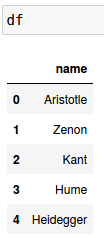

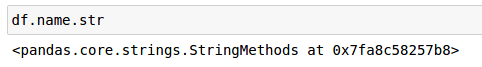

Применение
==
Строковые методы из str применяются к каждой ячейке колонки. Например, проверим, начинаются ли значения колонки name на 'A':

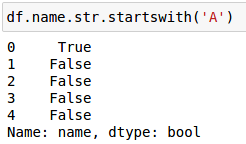
Что произошло: после обращения к атрибуту str мы вызвали метод startswith, в который передали строку 'A'. Это аналогично вызову типа:

'Aristotle'.startswith('A')
True

Только мы делаем это со всей колонкой. В результате получаем такую же колонку булиновских значений — True, если начинается на 'A', и False, если не начинается. Исходная колонка не меняется, возвращается новая.

Или перевод всех значений к верхнему регистру:

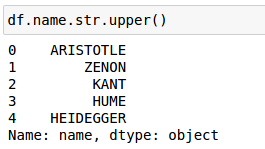

Слайсинг
==
Когда мы пишем str, то получаем доступ к строкам в колонке, и как бы вызываем от них строковый метод. Также мы можем делать срезы, например, возьмём первые 5 букв:

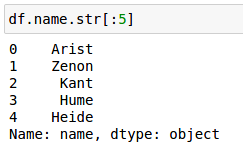
Что аналогично:

'Aristotle'[:5]
'Arist'

Сплит строк
==
По аналогии со сплитом обычной строки, мы можем засплиттить строки в серии, и получить на каждую ячейку по списку. Наш датафрейм немного изменился:

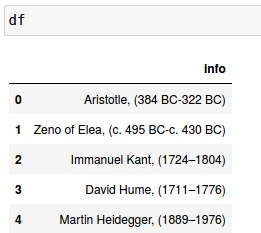

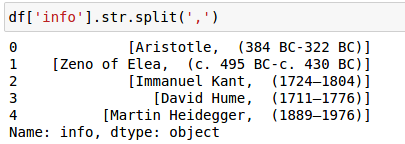
Здесь мы получили списки с двумя элементами.

Колонки со списками
==
При работе с такими колонками по спискам можно индексироваться и слайситься также при помощи атрибута str:
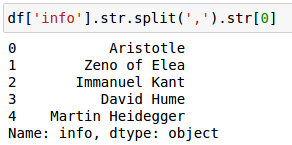
Что при работе с одним списком аналогично:

['David Hume', ' (1711–1776)'][0]
'David Hume'

Парсинг строковых колонок в пандас
==
Чтобы извлечь данные из строк в пандас есть специальный метод — extract. Он принимает паттерн РЕ, позволяющий вытащить нужные куски из текста в отдельные колонки.
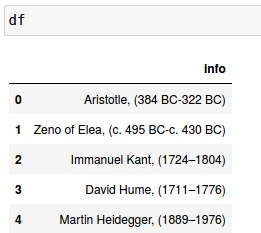
Извлечём отсюда информацию об имени и даты жизни:

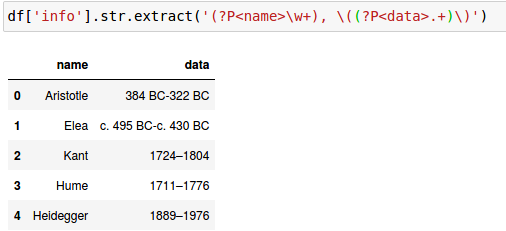
Итак,

df['info'].str — обращаемся к атрибуту со строковыми методами
extract — вызываем метод, достающий части текста

(?P<name>\w+) — это именованная группа, она как группа, только к ней можно обращаться по имени.
    
                                  (?P...) — говорит питону, что это именованная группа
    
                                  <name> — имя группы, в данном случае name
                                      
                                  \w+ — матчит буквы/цифры/подчёркивания, которые встречаются один или больше раз подряд
                                      
, \\( — запятая, пробел и скобочка, которые идут после первой группы.\, потому что символ скобки имеет специальное значение в РЕ.

(?P<data>.+) — другая именованная группа

               ?P — опять же, это идентификатор группы
               
                                 <data> — имя группы data
                                 
                                 .+ — берёт любой символ один или больше раз подряд
                                 
\) — скобочка после 2-й группы
                                      
Найдя в ячейке текст, подходящий под такое описание, extract вытащит его, разобьёт на указанные группы, и поместит в новые колонки с именами как в указанных группах. Данный паттерн не самый оптимальный, но не использует новых метасимволов.

extract возвращает новый датафрэйм с экстрагированным текстом.

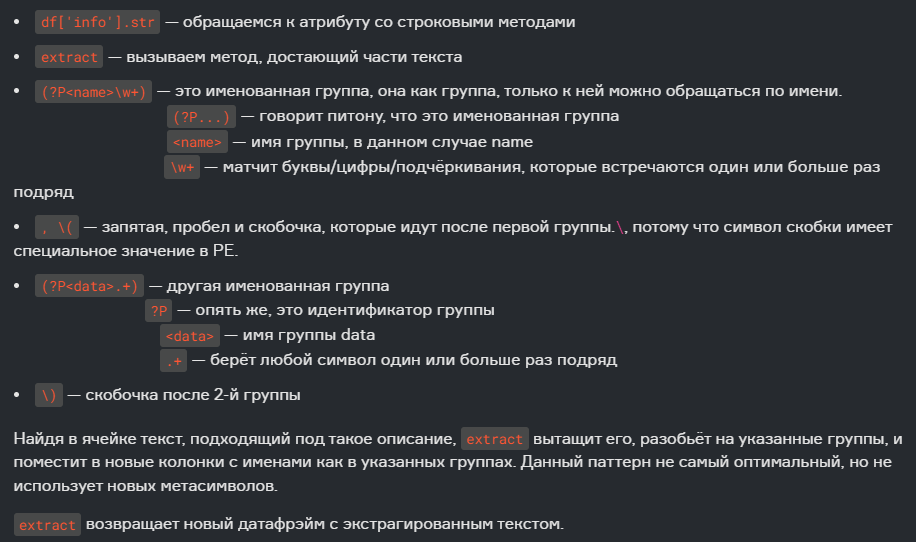

Отбор колонок по названию
==
В пандасе есть удобный метод отбора колонок или строк по их названию — filter. Кроме строк он также может работать с регэкспами, что позволяет гибко отбирать колонки.

pd.DataFrame.filter(items/like/regex, axis)

items — принимает список с названиями колонок или строк, особой разницы по сравнению с loc нет

like — принимает строку и возвращает все колонки, где в названии содержится строка, переданная в like

regex — принимает строку, означающую паттерн РЕ возвращает все колонки с названиями, матчимящимися на паттерн

axis — параметр для обозначения того, отбираем мы колонки или строки, принимает 'columns' или 'index', по умолчанию фильтрует колонки

Посмотрим на примере данных о перевозках

Отберём все колонки с 'id' в названии:
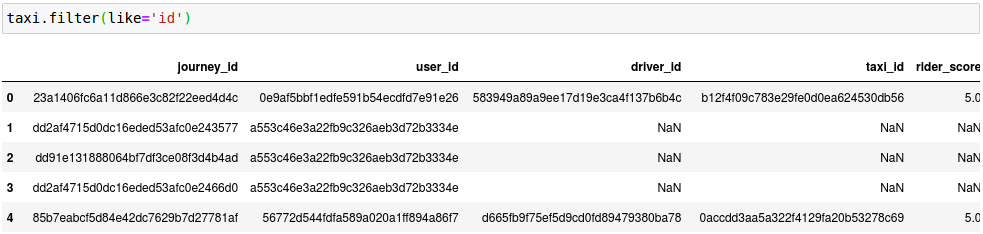

Как видите, мы получили только колонки с 'id' в названии — все колонки с идентификаторами и rider_score

А теперь возьмём по паттерну только колонки с идентификаторами:
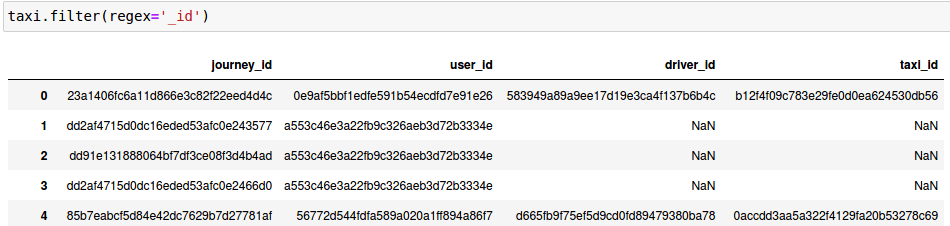